In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Dense,Dropout,Flatten,MaxPooling2D,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.python.framework import ops
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
dir = 'wildfire-dataset/train'
x = []
y = []
for direct in os.listdir(dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(dir,direct)):
        img_path = os.path.join(dir,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x.append(img)
        y.append(direct)
        


Loading dataset training nowildfire
Loading dataset training wildfire


In [3]:
dir_val = 'wildfire-dataset/valid'
x_val=[]
y_val=[]
for direct in os.listdir(dir_val):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(dir_val,direct)):
        img_path = os.path.join(dir_val,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation nowildfire
Loading dataset validation wildfire


In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
le = LabelEncoder()
int_label = le.fit_transform(y)
one_hot = to_categorical(int_label)

In [5]:
print(int_label)
print(one_hot)

[0 0 0 ... 1 1 1]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
le = LabelEncoder()
int_label = le.fit_transform(y_val)
one_hot_val = to_categorical(int_label)

In [7]:
x = np.array(x)
x_val = np.array(x_val)

In [8]:
from sklearn.utils import shuffle
x,one_hot = shuffle(x,one_hot)
x_val,one_hot_val = shuffle(x_val,one_hot_val)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,one_hot,test_size=0.2)

In [10]:
Y_train = np.array([np.array(i) for i in Y_train])
Y_test = np.array([np.array(i) for i in Y_test])
one_hot_val = np.array([np.array(i) for i in one_hot_val])

In [11]:
from keras import layers
from keras import models
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

c:\Users\arpit\.conda\envs\cuda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,048,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,418 (4.08 MB)

 Trainable params: 1,068,290 (4.08 MB)

 Non-trainable params: 128 (512.00 B)

In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [21]:
history=model.fit(X_train,Y_train,validation_data=(x_val,one_hot_val),batch_size=32,epochs=12)

Epoch 1/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9952 - loss: 0.0159 - val_accuracy: 0.9292 - val_loss: 0.6056
Epoch 2/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.9032 - val_loss: 0.6344
Epoch 3/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9397 - val_loss: 0.4739
Epoch 4/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.9438 - val_loss: 0.4030
Epoch 5/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9978 - loss: 0.0072 - val_accuracy: 0.9456 - val_loss: 0.5248
Epoch 6/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9963 - loss: 0.0093 - val_accuracy: 0.9427 - val_loss: 0.4757
Epoch 7/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9960 - loss: 0.0119 - val_accuracy: 0.9340 - val_loss: 0.4781
Epoch 8/12
757/757 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9968 - loss: 0.0083 - 

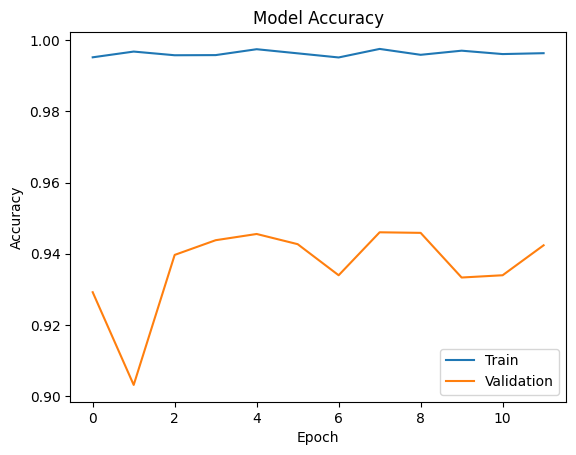

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

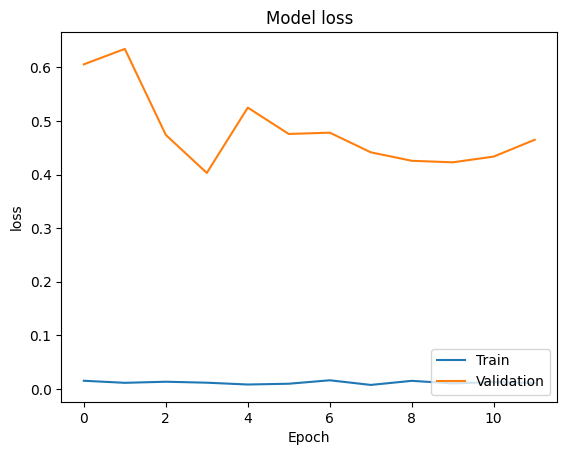

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

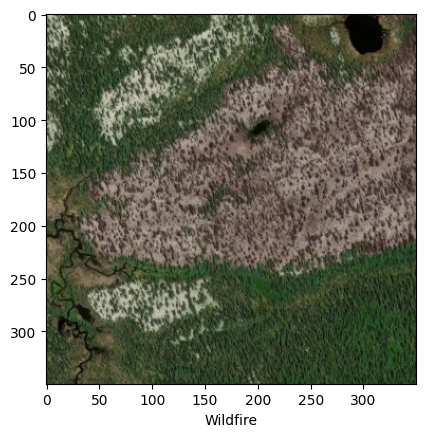

In [29]:
import matplotlib.image as mping
test_img_path = "wildfire-dataset/test/wildfire/-63.3175,51.3397.jpg"
img = mping.imread(test_img_path)
imgplot = plt.imshow(img)
plt.xlabel("Wildfire")
plt.show()

In [30]:
test_arr = []
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)

In [31]:
model.predict(test_arr) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.00141832, 0.99858165]], dtype=float32)

In [32]:
model.save('wildfire_model.h5')

In [33]:
from tensorflow.keras.models import load_model

# Load the entire model
loaded_model = load_model('wildfire_model.h5')

In [34]:
test_arr = []
test_image = cv2.imread(test_img_path)
test_image = cv2.resize(test_image,(32,32))
test_image = np.array(test_image)
test_image = test_image/255
test_image = test_image.reshape(1,32,32,3)
test_arr.append(test_image)
loaded_model.predict(test_arr) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.00141832, 0.99858165]], dtype=float32)